## Bibliotecas

In [2]:
import pandas
import matplotlib.pyplot as plot
import seaborn as sns
import numpy
import sklearn

## Lendo os Dados

In [3]:
dataset = pandas.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')


### Variáveis importantes

In [4]:
tests = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC','NU_NOTA_REDACAO']

dataset['NU_NOTA_TOTAL'] = dataset[tests].sum(axis=1)

students_without_zero_score = dataset.query('NU_NOTA_TOTAL != 0')

In [5]:
dataset.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


## Estudantes que fizeram prova em outras cidades

Total de estudantes que foram para outra cidade fazer a prova: 81848


Text(0, 0.5, 'Número de Estudantes')

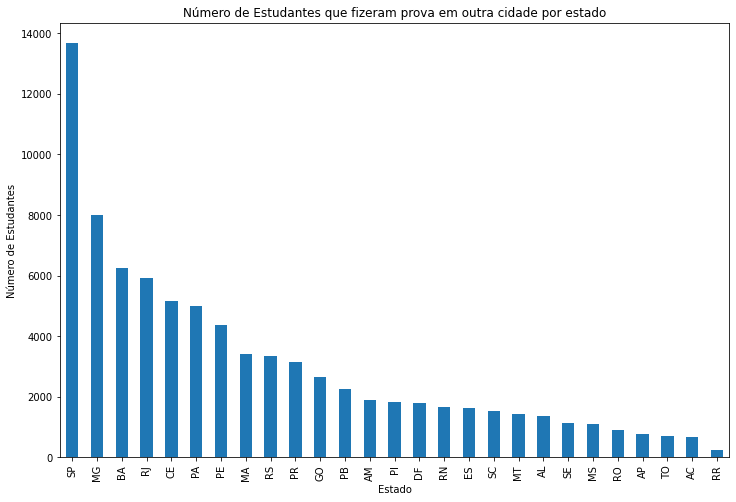

In [31]:
dataset['IN_PROVA_OUTRA_CIDADE'] = numpy.where(dataset['NO_MUNICIPIO_RESIDENCIA'] != dataset['NO_MUNICIPIO_PROVA'], 1, 0)
students_without_zero_score = dataset.query('NU_NOTA_TOTAL != 0') # atualizando variavel
students_with_test_in_other_city = students_without_zero_score.query('IN_PROVA_OUTRA_CIDADE == 0')

print(f'Total de estudantes que foram para outra cidade fazer a prova: {len(students_with_test_in_other_city)}')

number_of_students_per_state = students_with_test_in_other_city['SG_UF_RESIDENCIA'].value_counts()


number_of_students_per_state.plot.bar(figsize=(12,8))
plot.title('Número de Estudantes que fizeram prova em outra cidade por estado')
plot.xlabel('Estado')
plot.ylabel('Número de Estudantes')

Text(0, 0.5, 'Número de estudantes')

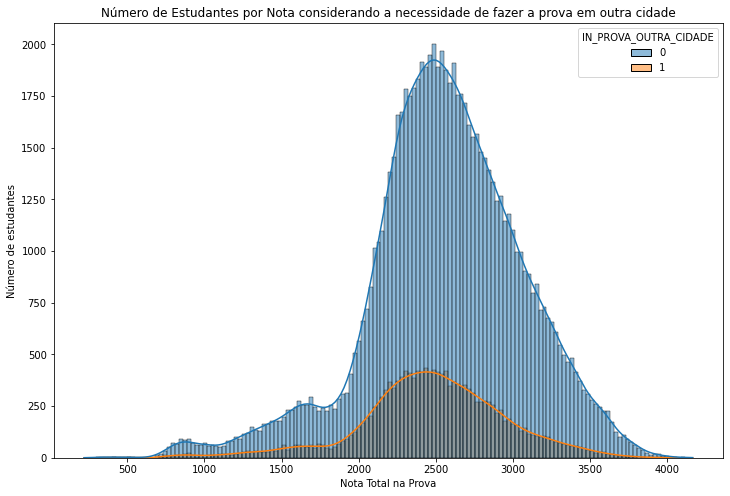

In [37]:
plot.figure(figsize=(12,8))
sns.histplot(students_without_zero_score, x='NU_NOTA_TOTAL', hue='IN_PROVA_OUTRA_CIDADE', kde=True)
plot.title('Número de Estudantes por Nota considerando a necessidade de fazer a prova em outra cidade')
plot.xlabel('Nota Total na Prova')
plot.ylabel('Número de estudantes')


## Classificação das Escolas

Text(0, 0.5, 'Número de estudantes')

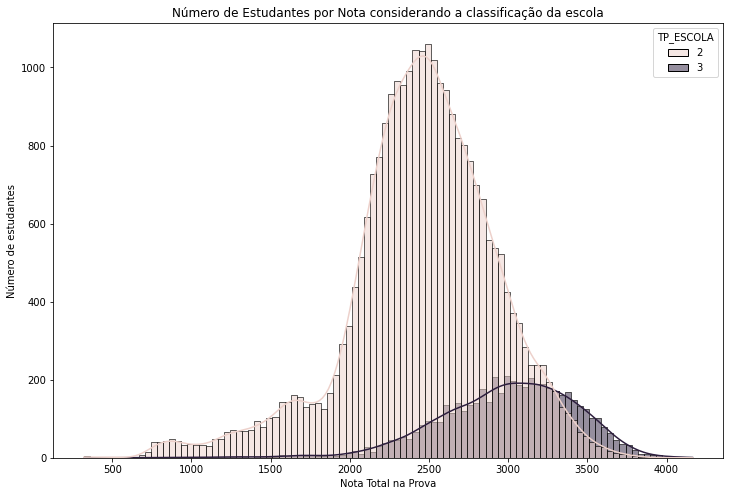

In [45]:
school_type_sample = students_without_zero_score.query('TP_ESCOLA != 1')

plot.figure(figsize=(12,8))
sns.histplot(school_type_sample, x='NU_NOTA_TOTAL', hue='TP_ESCOLA', kde=True)
plot.title('Número de Estudantes por Nota considerando a classificação da escola')
plot.xlabel('Nota Total na Prova')
plot.ylabel('Número de estudantes')

Text(0, 0.5, 'Notas dos Estudantes')

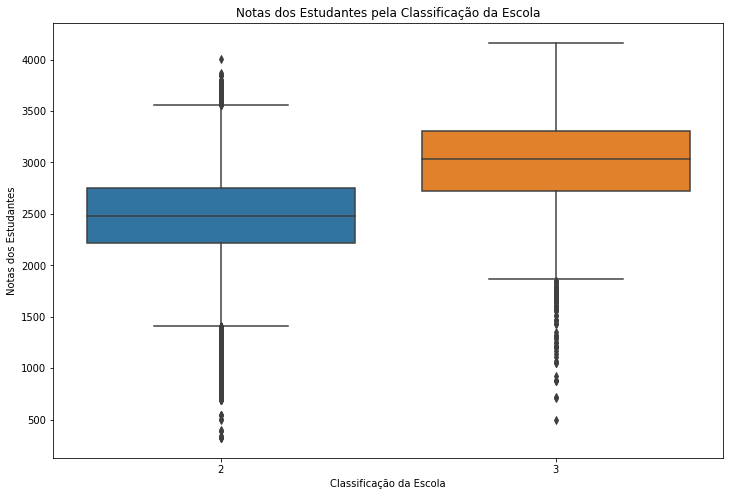

In [56]:
plot.figure(figsize = (12,8))

sns.boxplot(x='TP_ESCOLA',y='NU_NOTA_TOTAL', data=school_type_sample)
plot.title('Notas dos Estudantes pela Classificação da Escola')
plot.xlabel('Classificação da Escola')
plot.ylabel('Notas dos Estudantes')

Text(0, 0.5, 'Número de estudantes')

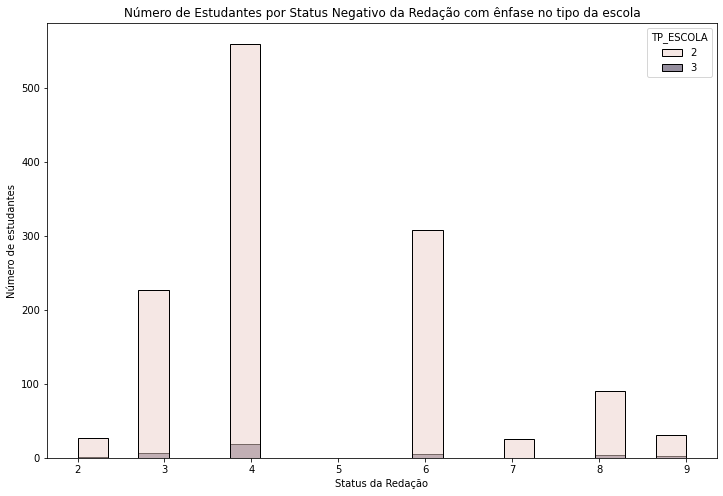

In [89]:
students_with_zero_on_essay = dataset.query('TP_STATUS_REDACAO != 1 and TP_ESCOLA != 1')

plot.figure(figsize = (12,8))

sns.histplot(data=students_with_zero_on_essay, x='TP_STATUS_REDACAO', hue='TP_ESCOLA')
plot.title('Número de Estudantes por Status Negativo da Redação com ênfase no tipo da escola')
plot.xlabel('Status da Redação')
plot.ylabel('Número de estudantes')

## Cor/Raça

Text(0, 0.5, 'Notas dos Estudantes')

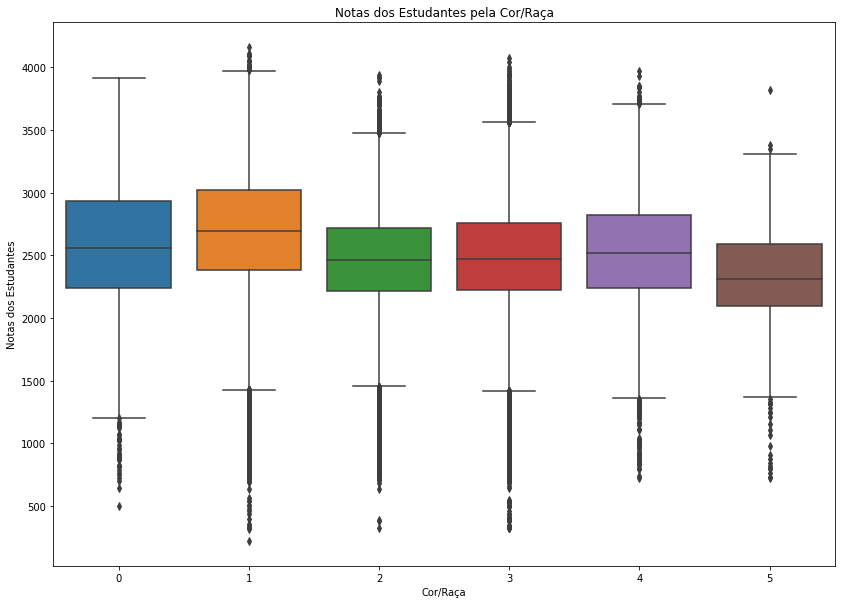

In [62]:
plot.figure(figsize = (14,10))


sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_TOTAL', data=students_without_zero_score)
plot.title('Notas dos Estudantes pela Cor/Raça')
plot.xlabel('Cor/Raça')
plot.ylabel('Notas dos Estudantes')

Text(0, 0.5, 'Notas dos Estudantes')

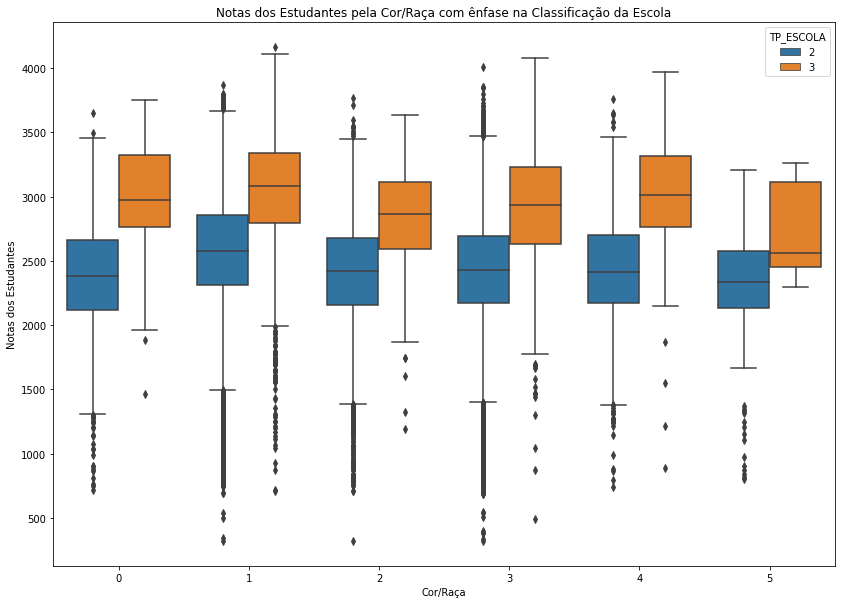

In [61]:
plot.figure(figsize = (14,10))

sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_TOTAL', hue='TP_ESCOLA', data=school_type_sample)
plot.title('Notas dos Estudantes pela Cor/Raça com ênfase na Classificação da Escola')
plot.xlabel('Cor/Raça')
plot.ylabel('Notas dos Estudantes')

(11.0, 40.0)

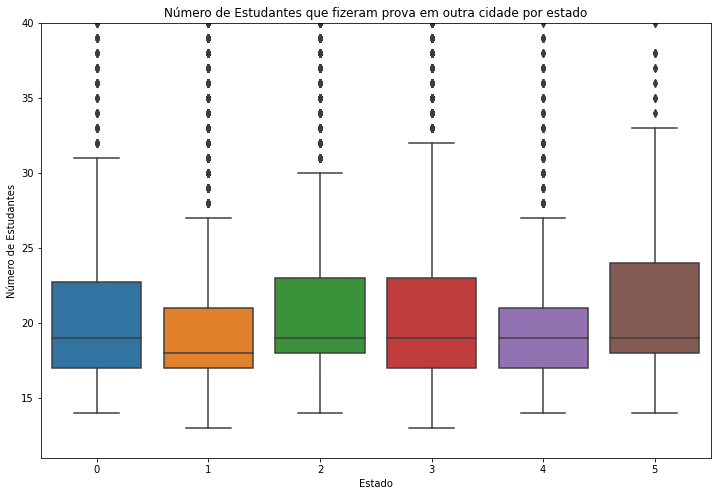

In [90]:
plot.figure(figsize = (12,8))

sns.boxplot(x='TP_COR_RACA', y='NU_IDADE', data=students_without_zero_score)
plot.title('Número de Estudantes que fizeram prova em outra cidade por estado')
plot.xlabel('Estado')
plot.ylabel('Número de Estudantes')

plot.ylim((11, 40))